# Medical Insurance Linear Regression Project

## Introduction

The following project will consist of an analysis and a linear regression of a dataset that is on [Machine Learning with R by Brett Lantz](https://www.amazon.com/Machine-Learning-techniques-predictive-modeling/dp/1788295862/ref=sr_1_1?keywords=machine+learning+with+r&qid=1651102155&sr=8-1) book. The dataset contains information about a medical insurance clients and some of their health characteristics such as age, if the person is smoker or not or, Body Mass Index and the main variable that I want to predict for this particular project, the insurance charges.

## Data cleaning/pre-processing

In [123]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [124]:
read_path = r'D:\Insurance Kaggle\\'
read_file = 'insurance.csv'
df = pd.read_csv('insurance.csv')
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [126]:
df2.isna().sum()

age                 0
bmi                 0
children            0
charges             0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

 Fortunately, we dont have any null value.

In [127]:
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [128]:
print("Sex: \n",df['sex'].value_counts())
print("Smoker: \n",df['smoker'].value_counts())
print("Region: \n",df['region'].value_counts())

Sex: 
 male      676
female    662
Name: sex, dtype: int64
Smoker: 
 no     1064
yes     274
Name: smoker, dtype: int64
Region: 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [129]:
df2 = pd.get_dummies(df)
print(df2.dtypes)
print(df2.columns)

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object
Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


Categorical variables were transformed into dummy variables in order to be able to use them in the models.

## Exploratory Data Analysis (EDA)

In [130]:
df2.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Skewness: 1.515880
Kurtosis: 1.606299


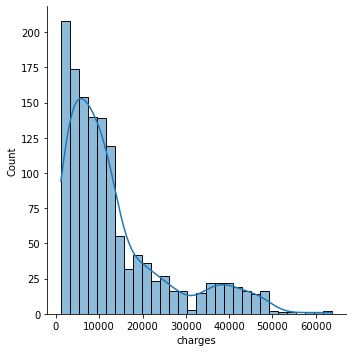

In [131]:

ax = sns.displot((df2['charges']), kde = True)
print("Skewness: %f" % df2['charges'].skew())
print("Kurtosis: %f" % df2['charges'].kurt())

Skewness: 0.055673
Kurtosis: -1.245088


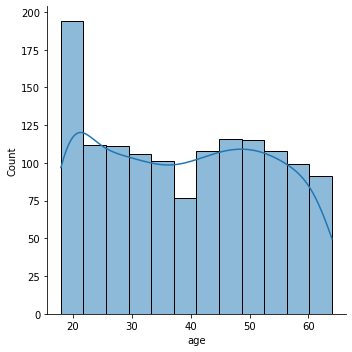

In [132]:
ax = sns.displot((df2['age']), kde = True)
print("Skewness: %f" % df2['age'].skew())
print("Kurtosis: %f" % df2['age'].kurt())

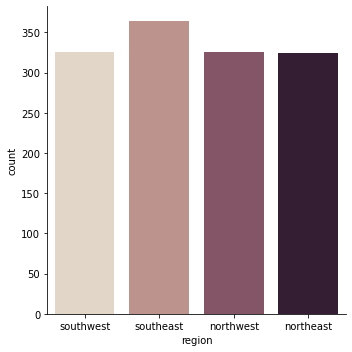

In [133]:
sns.catplot(x= 'region', kind="count", palette="ch:.25", data=df)


Text(0.5, 1.0, 'Cost for smoker/no smoker')

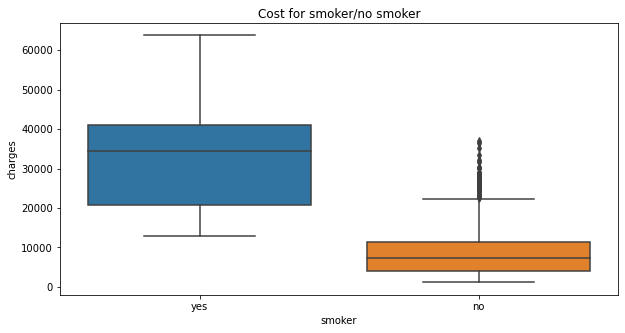

In [134]:
ax = sns.boxplot(x='smoker',y='charges', data = df)
plt.title('Cost for smoker/no smoker')

As we can infer without even looking at the data, the cost for smokers is higher.

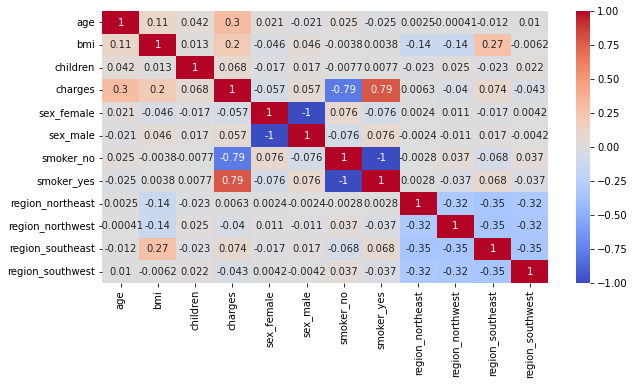

In [136]:
#dfeda = pd.read_csv('insurance.csv')

plt.rcParams['figure.figsize'] = (10, 5)
sns.heatmap(df2.corr(), cmap = 'coolwarm', annot = True)

plt.show()

As we can see, we dont have that much of strong correlations besides the smoker variable. Therefore, the model with the best performance will be a more complex one than a Ordinary Least Squares (OLS) regression.

In [137]:
df2.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [138]:
x = df2[['age', 'bmi', 'children',  'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]
y = df2[['charges']]


In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Recursive Feature Elimination

In [140]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

lr = LinearRegression()

rfecv = RFECV(estimator=lr, step=1, cv=5, scoring='r2')

rfecv = rfecv.fit(x_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.support_)
print(x.columns)

Optimal number of features : 9
[ True  True  True False False  True  True  True  True  True  True]
Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


We did Recursive Feature Elimination in order to select the right amount of variables which according to this process, that number is 9. However, since smoker_yes and smoker_ no are mutually exclusive, we decided to get rid of smoker_no.

### Outlier detection

In [141]:
max_threshold = df2['charges'].quantile(0.99)
max_threshold

48537.480726

We defined our max threshold as the percentile 99 of the charges.

In [142]:
df2[df2['charges']>max_threshold]

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
34,28,36.400,1,51194.55914,0,1,0,1,0,0,0,1
175,63,37.700,0,48824.45000,1,0,0,1,0,0,0,1
281,54,40.565,3,48549.17835,0,1,0,1,1,0,0,0
488,44,38.060,0,48885.13561,1,0,0,1,0,0,1,0
530,57,42.130,1,48675.51770,0,1,0,1,0,0,1,0
543,54,47.410,0,63770.42801,1,0,0,1,0,0,1,0
577,31,38.095,1,58571.07448,1,0,0,1,1,0,0,0
819,33,35.530,0,55135.40209,1,0,0,1,0,1,0,0
901,60,40.920,0,48673.55880,0,1,0,1,0,0,1,0
1062,59,41.140,1,48970.24760,0,1,0,1,0,0,1,0


As we can see, the "outliers" from max_threshold are that much of an outliers. We dont see any probable typo and the charges are reasonable so no need for us to get rid of them.

In [143]:
min_threshold = df2['charges'].quantile(0.01)
min_threshold

1252.97273

We defined our minimum threshold for charges as percentile 1.

In [144]:
df2[df2['charges']<min_threshold]

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
22,18,34.10,0,1137.0110,0,1,1,0,0,0,1,0
194,18,34.43,0,1137.4697,0,1,1,0,0,0,1,0
442,18,43.01,0,1149.3959,0,1,1,0,0,0,1,0
584,19,20.70,0,1242.8160,0,1,1,0,0,0,0,1
663,18,33.66,0,1136.3994,0,1,1,0,0,0,1,0
681,19,20.30,0,1242.2600,0,1,1,0,0,0,0,1
781,18,41.14,0,1146.7966,0,1,1,0,0,0,1,0
791,19,27.60,0,1252.4070,0,1,1,0,0,0,0,1
808,18,30.14,0,1131.5066,0,1,1,0,0,0,1,0
866,18,37.29,0,1141.4451,0,1,1,0,0,0,1,0


We can see that same pattern as max threshold occurs with the minimum. There isn't a probable typo and charges look reasonable, so again, no need to get rid of them.

In [145]:
x = df2[['age', 'bmi', 'children', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]
y = df2[['charges']]


In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

            feature        VIF
0               age   1.016188
1               bmi   1.104197
2          children   1.003714
3        smoker_yes   1.006369
4  region_northeast   8.451389
5  region_northwest   8.488621
6  region_southeast  11.369122
7  region_southwest   9.070253


We ran this process in order to visualize the multicollinearity of our features.

In [147]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Modeling

Since we want to predict the cost of the insurance we need a regression model in order to resolve this type of project. The models that we are going to use are the following: 
- Ordinary Least Square (OLS) regression.
- Lasso regression.
- Ridge regression.
- Elastic Net regression.
- Random Forest regression.
- Gradient Boosting regression.
- xGBoost regression.
- Polynomial regression.

For all models except for OLS we are doing an hyperparameter tuning in order to improve the performance of the models via [cross-validated grid search.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Ordinary Least Square (OLS) regression

In [169]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

ols = linear_model.LinearRegression()
ols.fit(x_train,y_train)
ols_yhat = ols.predict(x_test)

np.mean(cross_val_score(ols, x_train, y_train, cv = 5, scoring = "r2"))                    


0.730715516020408

### Lasso regression

In [170]:
model = linear_model.Lasso()
print("Lasso regression score: ", np.round(np.mean(cross_val_score(model, x_train, y_train, cv = 5, scoring = "r2")), 5))      


Lasso regression score:  0.73072


#### Lasso hyperparameter tuning

In [171]:
from sklearn.model_selection import GridSearchCV

alphas = [0.01, 0.1,0.5,0.75,1]
model = linear_model.Lasso(normalize=True, tol=1e-2)
grid_lasso = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv=5)
grid_lasso.fit(x_train, y_train)
print("Lasso regression best alpha value: ", grid_lasso.best_estimator_.alpha)
print("Lasso regression with hyperparameter tuning best score: ", np.round(grid_lasso.best_score_, 5))
print("Lasso regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(model, x_train, y_train, cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(grid_lasso.best_score_, 5))) * 100, 5)))



Lasso regression best alpha value:  0.75
Lasso regression with hyperparameter tuning best score:  0.73073
Lasso regression improvement after hyperparameter tuning: 0.00274%


### Ridge regression

In [151]:
model = linear_model.Ridge()
print("Ridge regression score: ", np.round(np.mean(cross_val_score(model, x_train, y_train, cv = 5, scoring = "r2")), 5))      
      


Ridge regression score:  0.73074


#### Ridge hyperparameter tuning

In [152]:
alphas = [int(x) for x in np.linspace(1, 10, num = 20)]
model = linear_model.Ridge()
grid_ridge = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid_ridge.fit(x_train, y_train)
print("Ridge regression best alpha value: ", grid_ridge.best_estimator_.alpha)
print("Ridge regression with hyperparameter tuning best score: ", np.round(grid_ridge.best_score_, 5))
print("Ridge regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(model, x_train, y_train, cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(grid_ridge.best_score_, 5))) * 100, 5)))

Ridge regression best alpha value:  1
Ridge regression with hyperparameter tuning best score:  0.73074
Ridge regression improvement after hyperparameter tuning: 0.0%


### Elastic Net regression

In [153]:
model = linear_model.ElasticNet()
print("Elastic Net regression score: ", np.round(np.mean(cross_val_score(model, x_train, y_train, cv = 5, scoring = "r2")), 5))

Elastic Net regression score:  0.37008


#### Elastic Net hyperparameter tuning

In [154]:
alphas = np.array([0.01, 0.02, 0.025, 0.05,0.1,0.5,1])
model = linear_model.ElasticNet()
grid_elastic = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid_elastic.fit(x_train, y_train)

print("Elastic Net regression best alpha value: ", grid_elastic.best_estimator_.alpha)
print("Elastic Net regression with hyperparameter tuning best score: ", np.round(grid_elastic.best_score_, 5))
print("Elastic Net regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(model, x_train, y_train, cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(grid_elastic.best_score_, 5))) * 100, 5)))

Elastic Net regression best alpha value:  0.01
Elastic Net regression with hyperparameter tuning best score:  0.73037
Elastic Net regression improvement after hyperparameter tuning: 49.32979%


### Random Forest Regression

In [155]:
from sklearn.ensemble import RandomForestRegressor
rf_Model = RandomForestRegressor()
print("Random Forest regression score: ", np.round(np.mean(cross_val_score(rf_Model, x_train, y_train.values.ravel(), cv = 5, scoring = "r2")), 5))      


Random Forest regression score:  0.81664


In [156]:
param_grid = {'n_estimators': [int(x) for x in np.linspace(50, 100, num = 3)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [2, 4, 8],
               'min_samples_split': [2, 5,10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
print(param_grid)

{'n_estimators': [50, 75, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 8], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


#### Random Forest hyperpameter tuning

In [157]:
from sklearn.ensemble import RandomForestRegressor
rf_Model = RandomForestRegressor()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)
rf_Grid.fit(x_train, y_train.values.ravel())
print(rf_Grid.best_params_)
print("Random Forest regression with hyperparameter tuning best score: ", np.round(rf_Grid.best_score_, 5))
print("Random Forest regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(rf_Model, x_train, y_train.values.ravel(), cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(rf_Grid.best_score_, 5))) * 100, 5)))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 75}
Random Forest regression with hyperparameter tuning best score:  0.84749
Random Forest regression improvement after hyperparameter tuning: 3.6791%


### Gradient Boosting Regression

In [158]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
print("Gradient Booster regression score: ", np.round(np.mean(cross_val_score(gbr, x_train, y_train.values.ravel(), cv = 5, scoring = "r2")), 5))      


Gradient Booster regression score:  0.83973


In [159]:
param_grid = {'n_estimators': [530, 535, 540],
               'learning_rate': [0.005, 0.01, 0.02],
               'max_depth': [1, 2, 4, 8],
               'subsample': [0.630, 0.635, 0.640]}
print(param_grid)

{'n_estimators': [530, 535, 540], 'learning_rate': [0.005, 0.01, 0.02], 'max_depth': [1, 2, 4, 8], 'subsample': [0.63, 0.635, 0.64]}


#### Gradient Boosting hyperparameter tuning

In [160]:
model = GradientBoostingRegressor()
grid_gbr = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)
grid_gbr.fit(x_train, y_train.values.ravel())
print(grid_gbr.best_params_)
print("Gradient Booster regression with hyperparameter tuning best score: ", np.round(grid_gbr.best_score_, 5))
print("Gradient Booster regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(gbr, x_train, y_train.values.ravel(), cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(grid_gbr.best_score_, 5))) * 100, 5)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 530, 'subsample': 0.63}
Gradient Booster regression with hyperparameter tuning best score:  0.84668
Gradient Booster regression improvement after hyperparameter tuning: 0.84093%


### XGBooster Regression

In [161]:
import xgboost
xgb = xgboost.XGBRegressor()
np.mean(cross_val_score(xgb, x_train, y_train, cv = 5, scoring = "r2"))       

0.7889197882553514

In [162]:
param_grid = {'n_estimators': [390, 400, 410],
               'learning_rate': [0.02, 0.021, 0.022],
               'max_depth': [2, 4, 8],
               'colsample_bytree': [0.5,0.75, 1],
               'subsample': [0.7,0.8, 0.9],
            'tree_method': ["hist"] }
print(param_grid)

{'n_estimators': [390, 400, 410], 'learning_rate': [0.02, 0.021, 0.022], 'max_depth': [2, 4, 8], 'colsample_bytree': [0.5, 0.75, 1], 'subsample': [0.7, 0.8, 0.9], 'tree_method': ['hist']}


#### XGBoost hyperparameter tuning

In [163]:
model = xgboost.XGBRegressor()
grid_xgb = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)
grid_xgb.fit(x_train, y_train)
print(grid_xgb.best_params_)
print("XGBoost regression with hyperparameter tuning best score: ", np.round(grid_xgb.best_score_, 5))
print("XGBoost Forest regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(xgb, x_train, y_train, cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(grid_xgb.best_score_, 5))) * 100, 5)))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
{'colsample_bytree': 0.75, 'learning_rate': 0.021, 'max_depth': 2, 'n_estimators': 400, 'subsample': 0.7, 'tree_method': 'hist'}
XGBoost regression with hyperparameter tuning best score:  0.84974
XGBoost Forest regression improvement after hyperparameter tuning: 7.15748%


### Polynomial regression

In [164]:
from sklearn.preprocessing import PolynomialFeatures
def create_polynomial_regression_model(degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x_train)
    poly = LinearRegression()
    return np.mean(cross_val_score(poly, X_poly, y_train, cv=5, scoring = "r2"))
cv_scores=[]
degrees =[2,3,4,5]
for degree in degrees:
    cv_scores.append(create_polynomial_regression_model(degree))
    
print(max(cv_scores))
    


0.752389488594334


Text(0.5, 1.0, 'R2 VS Degree')

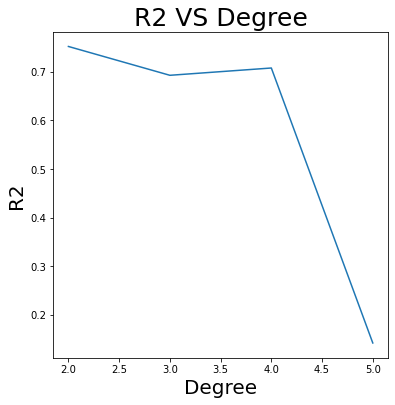

In [165]:
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(degrees,cv_scores)
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('R2',fontsize=20)
ax.set_title('R2 VS Degree',fontsize=25)

In [116]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(x_train)
poly = LinearRegression()
poly.fit(x_train, y_train)

    

LinearRegression()

# Model Evaluation

In [166]:
ols_yhat = ols.predict(x_test)
lasso_yhat  = grid_lasso.best_estimator_.predict(x_test)
ridge_yhat = grid_ridge.best_estimator_.predict(x_test)
elastic_yhat = grid_elastic.best_estimator_.predict(x_test)
forest_yhat = rf_Grid.best_estimator_.predict(x_test)
xgb_yhat = grid_xgb.predict(x_test)
gbr_yhat = grid_gbr.predict(x_test)
poly_yhat = poly.predict(x_test)

We make predictions using test data so we can get a glimpse at the models performance with unknown data.

In [167]:
from sklearn.metrics import r2_score


print("Ordinary Least Square accuracy: %.2f" % r2_score(y_test, ols_yhat) )
print("Lasso regression accuracy: %.2f" % r2_score(y_test, lasso_yhat) )
print("Ridge regression accuracy: %.2f" % r2_score(y_test, ridge_yhat) )
print("Elastic net regression accuracy: %.2f" % r2_score(y_test, elastic_yhat) )
print("Random forest regression accuracy: %.2f" % r2_score(y_test, forest_yhat) )
print("Gradient Booster regression accuracy: %.2f" % r2_score(y_test, gbr_yhat) )
print("XGBoost regression accuracy: %.2f" % r2_score(y_test, xgb_yhat) )
print("Polynomial regression accuracy: %.2f" % r2_score(y_test, poly_yhat) )

Ordinary Least Square accuracy: 0.80
Lasso regression accuracy: 0.80
Ridge regression accuracy: 0.80
Elastic net regression accuracy: 0.80
Random forest regression accuracy: 0.90
Gradient Booster regression accuracy: 0.90
XGBoost regression accuracy: 0.90
Polynomial regression accuracy: 0.80


We chose R2 as the evaluation metric because we think is pretty easy to interpret and easy to compare between models. As we can see, we were able to get a score of 0.90 R2 on 3 models. We think that is solid.

In [168]:
xgb_ytest =  y_test.reset_index(drop=True)
xgb_ypred = pd.DataFrame(xgb_yhat)
dfs = [xgb_ytest, xgb_ypred ]
xgb_df = pd.concat(dfs, axis = 1)
xgb_df.rename(columns = {0:'predictions'}, inplace = True)
xgb_df

,charges,predictions
0,9724.53000,12420.835938
1,8547.69130,10260.696289
2,45702.02235,44964.375000
3,12950.07120,15221.491211
4,9644.25250,10227.978516
...,...,...
263,15019.76005,17362.332031
264,6664.68595,7292.859863
265,20709.02034,12375.880859
266,40932.42950,39365.644531


Since XGBoost perfomed the best on cross-validation for training set, we use it in order to see the comparison between the actual charges and comparisons.

We suggest that an indicator such as body fat percentage would be a better predictor than Body Mass Index (BMI) in order to make better models.

From correlation standpoint we can safely say that individuals with smoking habit will end up spending more money on health insurance.

Thanks getting this far into reading this boring stuff. If you learned something then I could be greateful and in case you have any feedback (which I would hugely appreciate since I want to become a Data Scientist) please let me know! 